# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import math
import seaborn
import matplotlib.pyplot as plt
import numpy as ny

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23440,5,3450000.0,61.7,2018-11-21T00:00:00,4,2.60,5.0,44.9,4,NaN,False,False,5.3,1.0,посёлок городского типа Вырица,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7980,15,3790000.0,38.7,2017-12-20T00:00:00,1,2.65,18.0,18.0,17,NaN,False,False,12.0,2.0,Санкт-Петербург,33058.0,14156.0,0.0,NaN,1.0,935.0,45.0
14074,15,6000000.0,74.9,2017-12-18T00:00:00,2,NaN,4.0,36.5,3,NaN,False,False,17.7,NaN,Сестрорецк,53988.0,35087.0,0.0,NaN,0.0,NaN,441.0
12953,12,10000000.0,80.0,2018-02-01T00:00:00,3,3.00,6.0,54.0,3,NaN,False,False,7.0,1.0,Санкт-Петербург,26812.0,5510.0,3.0,502.0,0.0,NaN,NaN
22491,10,5900000.0,50.4,2017-07-18T00:00:00,2,3.00,10.0,33.0,3,NaN,False,False,7.3,0.0,Санкт-Петербург,11097.0,8823.0,0.0,NaN,0.0,NaN,21.0
10950,13,2250000.0,58.0,2017-08-09T00:00:00,2,NaN,5.0,32.0,2,NaN,False,False,9.0,1.0,Лодейное Поле,NaN,NaN,NaN,NaN,NaN,NaN,45.0
8261,20,36000000.0,123.2,2018-01-14T00:00:00,1,3.00,14.0,31.2,7,NaN,False,False,58.4,1.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,61.0
8503,15,2890000.0,30.4,2017-01-25T00:00:00,1,NaN,9.0,15.1,7,NaN,False,False,8.0,0.0,Санкт-Петербург,47001.0,15146.0,0.0,NaN,0.0,NaN,91.0
11113,18,4500000.0,34.5,2018-08-02T00:00:00,1,NaN,25.0,NaN,7,NaN,False,False,NaN,NaN,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,60.0
18376,6,4120000.0,58.0,2018-07-01T00:00:00,2,NaN,19.0,NaN,14,NaN,False,False,NaN,NaN,Санкт-Петербург,36763.0,14915.0,0.0,NaN,0.0,NaN,9.0


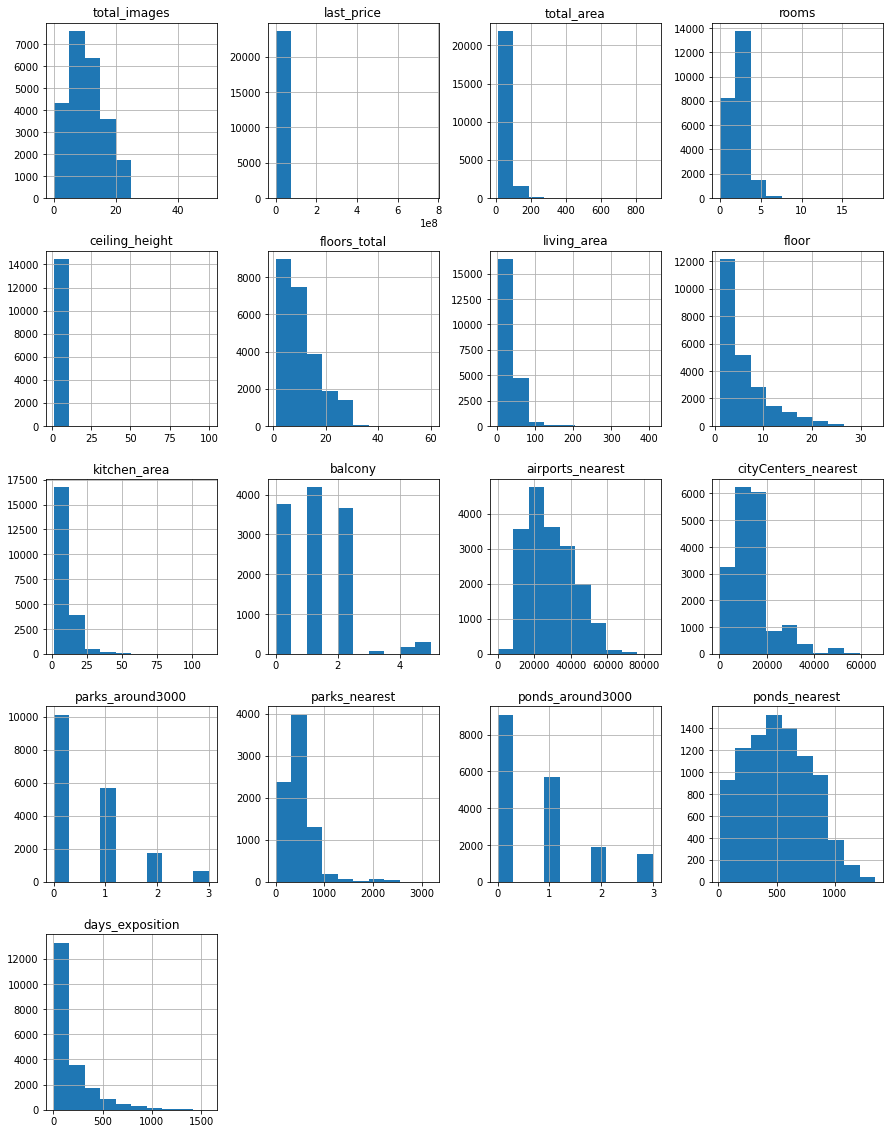

In [5]:
data.hist(figsize=(15, 20))
plt.show()

**Выводы:**
На первый взгляд данные довольно грязные. Много пропусков и присутствуют выбросы/аномальные значения типа 100-метровых потолков и 19-тикомнатных квартир. Исходя из стартовых гистограмм, нужно прилично почистить данные, чтобы с ними можно было работать в анализе.
**Проблемы, которые нужно постараться решить:**
- Отсутствует большое количество значений в столбцах (может быть вызвано ошибкой выгрузки данных, либо пользователи оставляли пропуски в довольно важных показателях - нужно проверить и сообщить специалистам);
- Некорректные типы данных (может быть обусловлено ошибкой выгрузки);

**В таблице довольно много пропусков, а также неверный тип данных по столбцам:**
- first_day_exposition (object) - должен быть - дата: Год-Месяц-Число;
- living_area - нулевые значения;
- is_apartment (object) - должен быть Bool, куча пропущенных;
- kitchen_area - много пропусков;
- balcony (object) - пропуски, должен быть int64 и только целочисленный;
- locality_name (object) - пропуски;
- airports_nearest - много пропусков;
- cityCenters_nearest - много пропусков;
- floors_total - пропуски и не может быть отрицательных значений;
- parks_around3000 (float) - должен быть int64 (целочисленный и неотрицательный);
- parks_nearest - пропуски;
- ponds_around3000 (float) - тип должен быть int64, есть нулевые значения;
- ponds_nearest - пропуски;
- days_exposition (float) - должен быть int64.

### Выполните предобработку данных

Начнем предобработку с вычисления явных дубликатов:

In [6]:
data.duplicated().sum()

0

Явных дублей нет, неявные будем отсеивать дальше.

In [7]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропусков много и они неоднородные. Приступим к анализу и исправлению того, что возможно, по отдельности:

In [8]:
data['total_images'].value_counts() #все чисто
data['ceiling_height'].value_counts() #все чисто
data['floor'].value_counts() #все чисто
data['total_area'].value_counts() #все чисто
data['rooms'].value_counts() #все чисто
data['airports_nearest'].value_counts() #все чисто
data['cityCenters_nearest'].value_counts() #все чисто, есть выбросы
data['parks_around3000'].value_counts() #все чисто
data['parks_nearest'].value_counts() #все чисто
data['ponds_around3000'].value_counts() #все чисто

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

На первый взгляд в этих столбцах все выглядит нормально, оставим их пока что без изменений.

In [9]:
data['locality_name'].unique()
len(data['locality_name'].unique())

365

Уберём неявные дубликаты, связанные с буквой "Ё" в названии

In [10]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True).str.lower()
data['locality_name'].fillna('unknown', inplace = True)
data['locality_name'].value_counts()

санкт-петербург              15721
поселок мурино                 556
поселок шушары                 440
всеволожск                     398
пушкин                         369
                             ...  
коттеджный поселок лесное        1
деревня лупполово                1
поселок плоское                  1
деревня щеглово                  1
поселок мыза-ивановка            1
Name: locality_name, Length: 331, dtype: int64

Столбец **locality_name** от дублей очистили, но есть пропуски, природа которых пока не ясна. Заменил пропуски названием Unknown.

In [11]:
data['is_apartment'].astype(bool).value_counts()
data['is_apartment'].fillna(False).isna().sum()


0

В разделе **is_apartment** слишком много пропусков, возможно данный показатель появился не с начала ведения учета данных. Заменил пропуски на False.

In [12]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int32')

По столбцу **days_exposition** пропуски спокойно можно заменить на 0.

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

У **first_day_exposition** исправим формат на дату (год-месяц-день), поскольку время не указано, его уберем.

In [14]:
data['balcony'].fillna(0).astype(int).value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

В столбце **balcony** заменим пропуски на 0, исходя из предположения: балкон не указан = отсутствует. Представим в формате int64.

In [15]:
data['ceiling_height'].value_counts()
data['ceiling_height'].median()

2.65

В **ceiling_height** есть ошибочные завышенные значения, отфильтруем их позже во время анализа. Медиана не сильно ушла от среднего, предположительно выбросы не сильно повлияли на выборку.

In [16]:
data['last_price'] = data['last_price'].astype(int)

Приведем формат **last_price** к int64 для удобства использования и нормальной визуализации.

In [17]:
data['floors_total'].fillna(0, inplace= True)
data['floors_total'].isna().sum()

0

Поскольку пропусков в **floors_total** совсем немного - предположил, что не указывали количество этажей для загородных домой, заменил на 0.

In [18]:
data['cityCenters_nearest'].isna().sum()

5519

Многовато пропусков в **cityCenters_nearest**, возможно ошибка сервиса геолокации, думаю лучше заполнить медианой.

In [19]:
xin = data['cityCenters_nearest'].dropna().median()
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(xin)
data['cityCenters_nearest'].isna().sum()

0

In [20]:
data_new = data
avg_total_med = data_new['total_area'].median()
data_new['avg_living_area'] = data_new['living_area']/data_new['total_area']
avg_living_med = data_new['avg_living_area'].dropna().median() * avg_total_med #нашел медианную жилую площадь в процентном отношении от общей
data_new['avg_kitchen_area'] = data_new['kitchen_area']/data_new['total_area'] 
avg_kitchen_med = data_new['avg_kitchen_area'].dropna().median() * avg_total_med #нашел медианную кухонную площадь в процентном отношении от общей
data['kitchen_area'] = data['kitchen_area'].fillna(avg_kitchen_med)
data['living_area'] = data['living_area'].fillna(avg_living_med)
print('Пропуски в жилой площади:',data['living_area'].isna().sum())
print('Пропуски в кухонной площади:',data['kitchen_area'].isna().sum())

Пропуски в жилой площади: 0
Пропуски в кухонной площади: 0


Заполнил пропуски в **kitchen_area** и **living_area** по принципу нахождения медианной процентной доли целевой площади от медианной общей.
P.S. Пытался несколькими более короткими и простыми способами, в т.ч. pivot_table. Но Юпитер почему-то на первый раз код пускал, а потом падал в ошибки (пример: 'float' object has no attribute 'sum') :(

**Подводя итоги раздела Предобработки, стоит сказать, что мы успешно избавились от дубликатов и пропусков там, где это возможно. Определили показатели, которые исправлению не поддаются - о них  мы сообщим специалистам. Типы данных привели к правильным, где можно - пропуски заполнили медианными значениями. Теперь данные пригодны для дальнейшего анализа ദ്ദി**

### Добавьте в таблицу новые столбцы

**Задание**.
**Добавьте в таблицу новые столбцы со следующими параметрами:**
- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [21]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,avg_living_area,avg_kitchen_area
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,NaN,False,False,25.000000,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.600000,1,NaN,False,False,11.000000,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.300000,4,NaN,False,False,8.300000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,29.528715,9,NaN,False,False,8.965517,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,NaN,False,False,41.000000,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.400000,5,NaN,False,False,9.100000,NaN,городской поселок янино-1,NaN,13098.5,NaN,NaN,NaN,NaN,55,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.600000,6,NaN,False,False,14.400000,1.0,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,29.528715,22,NaN,False,False,18.900000,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0,NaN,0.263966
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.430000,26,NaN,False,False,8.810000,NaN,поселок мурино,NaN,13098.5,NaN,NaN,NaN,NaN,189,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,NaN,False,False,6.500000,2.0,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,0.714754,0.106557


In [22]:
data['cost_metr'] = data['last_price']/data['total_area']
data['cost_metr'] = data['cost_metr'].round(2)
data['weekday_expos'] = data['first_day_exposition'].dt.weekday
data['month_expos'] = data['first_day_exposition'].dt.month
data['year_expos'] = data['first_day_exposition'].dt.year 
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,avg_living_area,avg_kitchen_area,cost_metr,weekday_expos,month_expos,year_expos
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,NaN,False,False,25.000000,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,0.472222,0.231481,120370.37,3,3,2019
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.600000,1,NaN,False,False,11.000000,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,0.460396,0.272277,82920.79,1,12,2018
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.300000,4,NaN,False,False,8.300000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,0.612500,0.148214,92785.71,3,8,2015
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,29.528715,9,NaN,False,False,8.965517,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,NaN,NaN,408176.10,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,NaN,False,False,41.000000,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,0.320000,0.410000,100000.00,1,6,2018
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.400000,5,NaN,False,False,9.100000,NaN,городской поселок янино-1,NaN,13098.5,NaN,NaN,NaN,NaN,55,0.473684,0.299342,95065.79,0,9,2018
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.600000,6,NaN,False,False,14.400000,1.0,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,0.284182,0.386059,99195.71,3,11,2017
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,29.528715,22,NaN,False,False,18.900000,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0,NaN,0.263966,110544.69,3,4,2019
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.430000,26,NaN,False,False,8.810000,NaN,поселок мурино,NaN,13098.5,NaN,NaN,NaN,NaN,189,0.465320,0.265682,87454.76,2,5,2018
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,NaN,False,False,6.500000,2.0,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,0.714754,0.106557,88524.59,6,2,2017


В результате добавили столбцы стоимости квадратного метра; дня,месяца,года публикации объявления в соответствии с заданием.

In [23]:
def f_c(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(f_c, axis=1)

In [24]:
print(data['floor_category'].unique())
data['floor_category'].sample(10)

['другой' 'первый' 'последний' None]


23575    первый
6761     первый
9867     другой
6618     другой
3110     другой
9580     другой
23375    другой
22649    другой
18856    другой
14821    другой
Name: floor_category, dtype: object

Добавил категоризацию по этажу дома в соотвествии с заданием.

In [25]:
data['center_km'] = data['cityCenters_nearest']/1000
data['center_km'] = data['center_km'].apply(lambda x: math.ceil(x))
print (data['center_km'].head(10))
data['center_km'].describe()

0    17
1    19
2    14
3     7
4     9
5    14
6    20
7    12
8    14
9    16
Name: center_km, dtype: int64


count    23699.000000
mean        14.532807
std          7.547753
min          1.000000
25%         11.000000
50%         14.000000
75%         16.000000
max         66.000000
Name: center_km, dtype: float64

Расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений) - Готово, сохранил тип данных float.

### Проведите исследовательский анализ данных

#### Изучим перечисленные ниже параметры объектов:

In [26]:
t_a_pivot = data.pivot_table(
    index = 'locality_name', values='total_area', aggfunc=('median','count')
).sort_values(by='count',ascending=False
)
t_a_pivot.columns = ['total_notes', 'median_total_area']
t_a_pivot.head(10)

,total_notes,median_total_area
locality_name,,
санкт-петербург,15721,55.00
поселок мурино,556,37.40
поселок шушары,440,50.10
всеволожск,398,53.55
пушкин,369,53.20
колпино,338,50.00
поселок парголово,327,43.00
гатчина,307,45.00
деревня кудрово,299,39.90


Наибольшее число объявлений квартир собралось в Санкт-Петербурге, здесь медианная площадь выше всего.

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

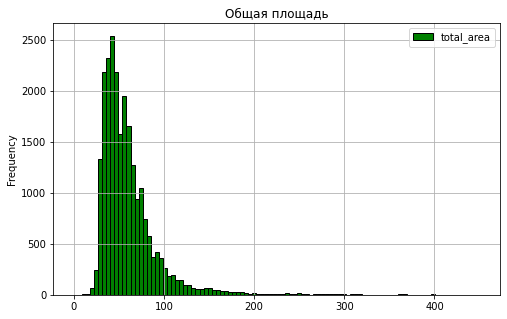

In [63]:
data.plot(title='Общая площадь',y='total_area', kind='hist', bins=100,grid=True, figsize=(8,5), range=(0,450), color='green', ec='black')

Распределение данных нормальное, выбросы совсем некритичные.

In [28]:
l_a_pivot = data.pivot_table(
    index = 'locality_name', values='living_area', aggfunc=('median','count')
).sort_values(by='count',ascending=False
)
l_a_pivot.columns = ['total_notes', 'median_living_area']
l_a_pivot.head(10)

,total_notes,median_living_area
locality_name,,
санкт-петербург,15721,30.100000
поселок мурино,556,18.000000
поселок шушары,440,29.528715
всеволожск,398,29.528715
пушкин,369,29.528715
колпино,338,29.528715
поселок парголово,327,19.000000
гатчина,307,29.528715
деревня кудрово,299,18.500000


Рассматривая жилую площадь, в лидерах снова Санкт-Петебург. Пригороды Шушары, Всеволожск и т.д. практически не отстают по медианной площади.

count    23699.000000
mean        34.062049
std         21.169814
min          2.000000
25%         19.000000
50%         29.528715
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

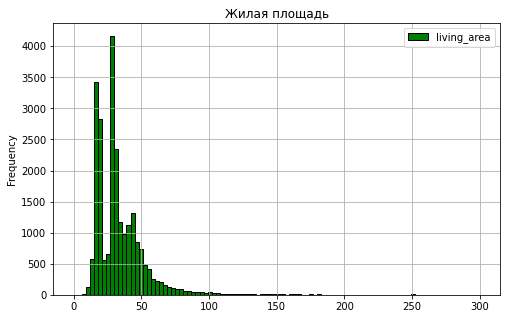

In [64]:
data.plot(title='Жилая площадь', y='living_area', kind='hist', bins=100,grid=True, figsize=(8,5), range=(0,300), color='green', ec='black')
data['living_area'].describe()

Распределение жилой площади уже содержит критичные выбросы, влияющие на распределение, которое стремится к нормальному.

In [30]:
k_a_pivot = data.pivot_table(
    index = 'locality_name', values='kitchen_area', aggfunc=('median','count')
).sort_values(by='median',ascending=False
)
k_a_pivot.columns = ['total_notes', 'median_kitchen_area']
k_a_pivot.head(10)

,total_notes,median_kitchen_area
locality_name,,
деревня пикколово,1,23.600000
деревня каськово,1,22.000000
коттеджный поселок кивеннапа север,1,18.000000
деревня глинка,2,17.250000
деревня юкки,5,15.000000
деревня бор,2,13.382759
садовое товарищество новая ропша,1,13.000000
деревня кальтино,7,12.760000
деревня куттузи,7,12.500000


В Санкт-Петербурге кухни не такие уж и большие :)

count    23699.000000
mean        10.415599
std          5.634314
min          1.300000
25%          7.400000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

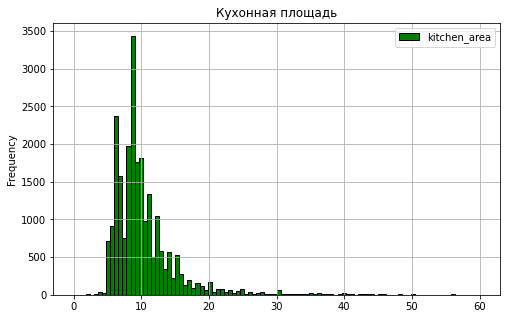

In [65]:
data.plot(title='Кухонная площадь', y='kitchen_area', kind='hist', bins=100,grid=True, figsize=(8,5), range=(0,60), color='green', ec='black')
data['kitchen_area'].describe()

В данных присутствую аномалии типа 1м.кв. согласно графику площадь стоит анализировать ориентировочно с 5ти кв.м., что возможно в реальности. Но в целом, распределение стремится к нормальному. 

In [32]:
l_p_pivot = data.pivot_table(
    index = 'locality_name', values='last_price', aggfunc=('median','count')
).sort_values(by='count',ascending=False
)
l_p_pivot.columns = ['total_notes', 'median_last_price']
l_p_pivot.head(10)

,total_notes,median_last_price
locality_name,,
санкт-петербург,15721.0,5500000.0
поселок мурино,556.0,3400000.0
поселок шушары,440.0,3950000.0
всеволожск,398.0,3450000.0
пушкин,369.0,5180000.0
колпино,338.0,3600000.0
поселок парголово,327.0,4100000.0
гатчина,307.0,3100000.0
деревня кудрово,299.0,3790000.0


Интересно, что средняя стоимость квартир в Пушкине приближена к стоимости в Санкт-Петербурге.

<AxesSubplot:title={'center':'Стоимость'}, ylabel='Frequency'>

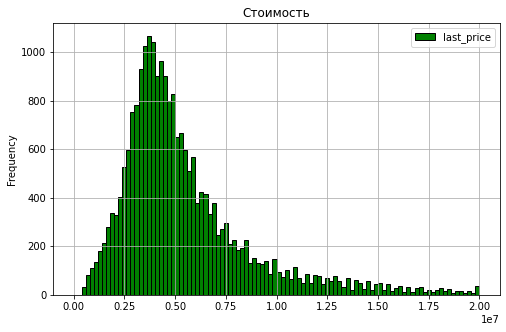

In [66]:
data.plot(title='Стоимость', y='last_price', kind='hist', bins=100, grid=True, range=(0,20000000), figsize=(8,5),color='green', ec='black')

Распределение по цене нормальное, с данными все в порядке.

In [34]:
r_pivot = data.pivot_table(
    index = 'locality_name', values='rooms', aggfunc=('median','count')
).sort_values(by='count',ascending=False
)
r_pivot.columns = ['total_notes', 'rooms']
r_pivot.head(10)

,total_notes,rooms
locality_name,,
санкт-петербург,15721.0,2.0
поселок мурино,556.0,1.0
поселок шушары,440.0,2.0
всеволожск,398.0,2.0
пушкин,369.0,2.0
колпино,338.0,2.0
поселок парголово,327.0,1.0
гатчина,307.0,2.0
деревня кудрово,299.0,1.0


Чаще всех продают 1 и 2-х комнатные квартиры.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

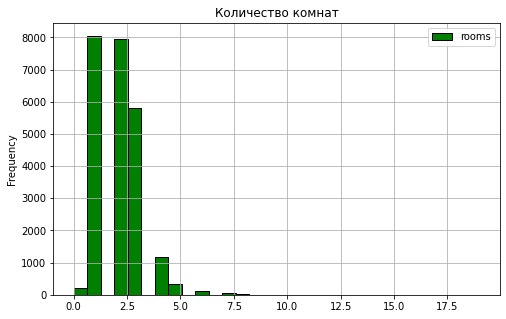

In [67]:
data.plot(title='Количество комнат', y='rooms', kind='hist', bins=30, grid=True, figsize=(8,5), color='green', ec='black')
data['rooms'].describe()

Распределение нормальное, если отсечь часть аномалий типа 0 комнат.

In [36]:
rata = data.query('ceiling_height > 2 and ceiling_height < 6')
c_h_pivot = rata.pivot_table(
    index = 'locality_name', values='ceiling_height', aggfunc=('median','count')
).sort_values(by='count',ascending=False
)
c_h_pivot.columns = ['total_notes', 'median_ceiling_height']
c_h_pivot.head(10)

,total_notes,median_ceiling_height
locality_name,,
санкт-петербург,10082,2.70
всеволожск,271,2.70
пушкин,234,2.60
поселок шушары,217,2.63
поселок мурино,212,2.70
колпино,203,2.50
гатчина,148,2.55
петергоф,145,2.55
поселок парголово,137,2.64


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

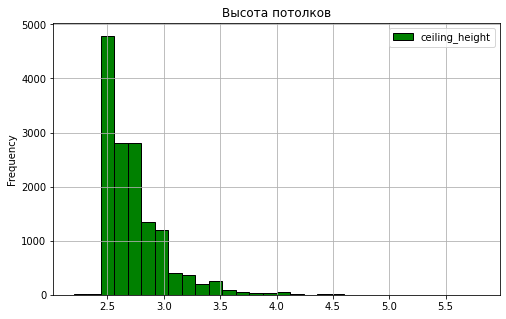

In [68]:
rata.plot(title='Высота потолков', y='ceiling_height', kind='hist', bins=30, grid=True, figsize=(8,5), color='green', ec='black')
data['ceiling_height'].describe()

Отсеили аномалии, распределение данных нормальное. Как и ожидал, больше всего объявлений с потолками 2.5 - 2.7 метра.

In [38]:
data.pivot_table(index='floor_category', values='floors_total', aggfunc=('median','count'))

,count,median
floor_category,,
другой,17363,10.0
первый,2917,5.0
последний,3336,5.0


"Первых" и "последних" этажей больше всего в пятиэтажках, а вот другие распределились в особенности по 10ти этажкам.

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

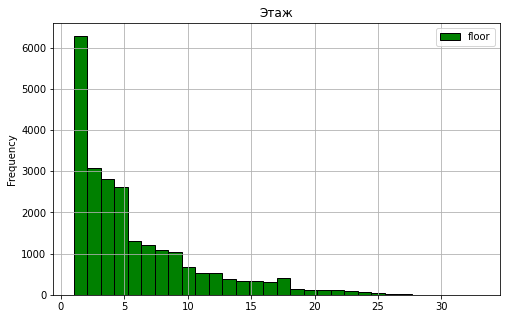

In [69]:
data.plot(title='Этаж', y='floor', kind='hist', bins=30, grid=True, figsize=(8,5), color='green', ec='black')
data['floor'].describe()

Конечно тут многовато низких домов :) можно сделать срез после 5ти этажных (характерных для Питера), но мы потеряем много данных. Так или иначе, распределение нормальное несмотря на выбросы

In [40]:
cc_pivot = data.pivot_table(
    index='locality_name', values='cityCenters_nearest', aggfunc=('median','count')
).sort_values(by='count',ascending=False
)
cc_pivot.columns = ['total_notes', 'median_Centers_nearest']
cc_pivot.head(10)

,total_notes,median_Centers_nearest
locality_name,,
санкт-петербург,15721,12260.0
поселок мурино,556,13098.5
поселок шушары,440,24211.0
всеволожск,398,13098.5
пушкин,369,27920.0
колпино,338,32018.0
поселок парголово,327,19311.0
гатчина,307,13098.5
деревня кудрово,299,13098.5


count    23699.000000
mean     13936.792797
std       7553.779633
min        181.000000
25%      10927.000000
50%      13098.500000
75%      15248.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

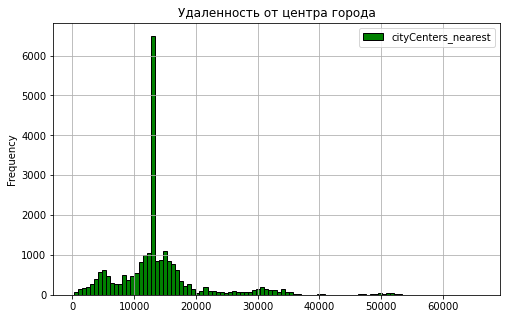

In [70]:
data.plot(title='Удаленность от центра города', y='cityCenters_nearest', kind='hist', bins=100, grid=True, figsize=(8,5), color='green', ec='black')
data['cityCenters_nearest'].describe()

Больше половины квартир в Питере в 12ти километрах от центра. В данных есть большие выбросы.

In [42]:
cc_pivot = data.pivot_table(
    index='locality_name', values='parks_nearest', aggfunc=('median','count')
).sort_values(by='count',ascending=False
)
cc_pivot.columns = ['total_notes', 'median_parks_nearest']
cc_pivot.head(10)

,total_notes,median_parks_nearest
locality_name,,
санкт-петербург,7284,460.0
пушкин,212,399.5
петергоф,143,294.0
колпино,133,393.0
кронштадт,87,293.0
сестрорецк,72,367.0
красное село,46,428.5
павловск,26,312.0
поселок стрельна,19,700.0


count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

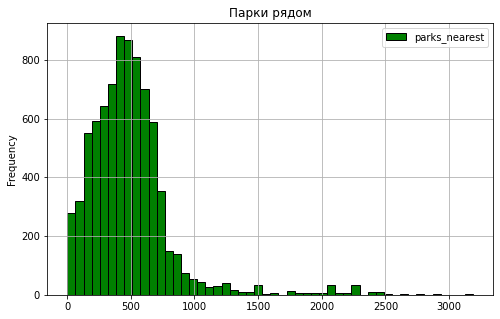

In [71]:
data.plot(title='Парки рядом', y='parks_nearest', kind='hist', bins=50, grid=True, figsize=(8,5), color='green', ec='black')
data['parks_nearest'].describe()

Распределение нормальное, выбросы не сильно влияют на выборку, мат.ожидание близко к медианному значению.

**В общем и целом, показатели мы получили нормальные, с ними можно работать. Наибольшее число квартир в Санкт-Петербурге в невыскоих домах, с потолками 2.7м и площадью 50м.кв. = 2х комнатные квартиры. Медианная цена на квартиру в СПб в районе 5,5млн. руб.**

####  Теперь посмотрим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

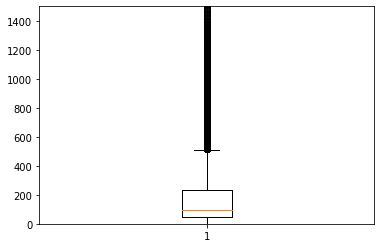

In [44]:
plt.boxplot(data.loc[data['days_exposition']!=0]['days_exposition'])
plt.ylim(0,1500)
data.loc[data['days_exposition']!=0]['days_exposition'].describe()

(っ◕‿◕)っ☆ﾟ.*･｡ﾟ Если отсеять ошибочную выборку с 0 дней, топ получаем следующие выводы. 25% квартир (1ый квартиль) продается довольно быстро - в первые 45 дней. У нас довольно большая разница между медианой и средним. Посмотрим данные поближе и уменьшим масштаб на гистограмме.

<AxesSubplot:ylabel='Frequency'>

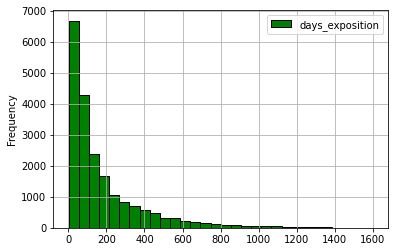

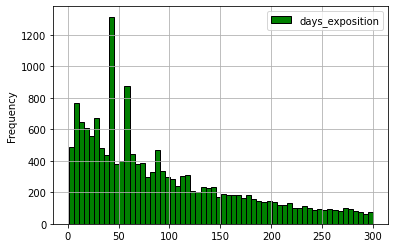

In [45]:
data.plot(y='days_exposition', kind='hist', bins=30, grid=True, range=(1,1600), color = 'green', ec='black')
data.plot(y='days_exposition', kind='hist', bins=60, grid=True, range=(1,300), color = 'green', ec='black')

In [46]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()
#45, 60, 7, 30, 90 дней - подозрительно чаще всех встречаются, похоже на автоматическое снятие, Уберем их из расчетов

45      880
60      538
7       234
30      208
90      204
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1141, dtype: int64

In [47]:
nice_data = data.query('days_exposition != [0,45,60,7,30,90]')
nice_data['days_exposition'].describe()

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

Теперь похоже на хорошее распределение, медиана максимальна близка к среднему :) построим графики и убедимся

<AxesSubplot:ylabel='Frequency'>

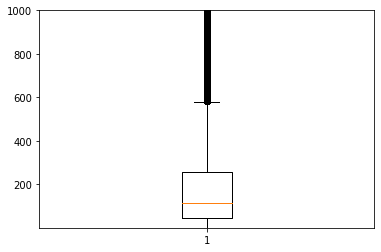

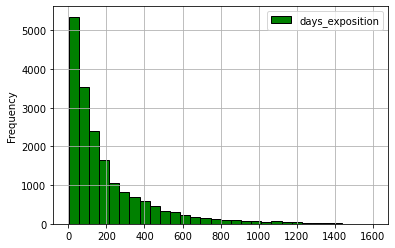

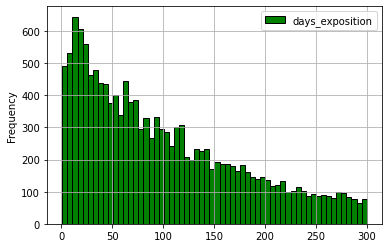

In [48]:
plt.boxplot(nice_data['days_exposition'])
plt.ylim(1,1000)
nice_data.plot(y='days_exposition', kind='hist', bins=30, grid=True, range=(1,1600), color = 'green', ec='black')
nice_data.plot(y='days_exposition', kind='hist', bins=60, grid=True, range=(1,300), color = 'green', ec='black')

**ଘ(∩^o^)⊃━☆゜ﾟПолучается 25% объявлений согласно статистике продается за 44 дня, а половина за 115 дней. Нормальные значения увеличи свой пул и располагаются в отрезке до 600 дней. Соответсвенно быстрые продажи зв 44дня и менее. Долгие продажи после 259 дней.**

#### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.

**Влияние общей площади на стоимость квадратного метра:**

In [49]:
q_data=data.pivot_table(
    index='total_area', values='cost_metr', aggfunc=['count','median']
).sort_values(by='total_area')
q_data.columns = ['count', 'median']
q_data.sample(10)

,count,median
total_area,,
136.20,1,98825.26
58.81,1,180241.46
27.60,3,76086.96
55.20,27,88768.12
95.40,1,121198.91
25.40,1,129921.26
70.60,12,105169.97
42.63,1,70349.52
90.50,7,97237.57


Пока что видим, что данные как-то идут вразнобой... Пока что от увеличения территории, цена квадратного метра пропорционально не увеличивается/уменьшается. Построим графику корелляции.

Показатель корреляции: 0.30196021032713416


<AxesSubplot:xlabel='total_area', ylabel='cost_metr'>

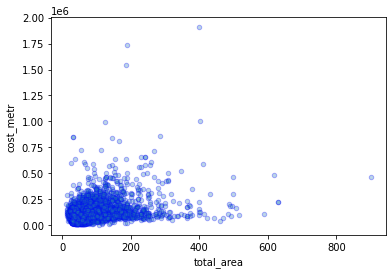

In [50]:
print('Показатель корреляции:',data['total_area'].corr(data['cost_metr']))
data.plot(x='total_area', y='cost_metr', kind='scatter', alpha=0.3, ec='blue') 

Показатель корреляции говорит нам о том, что зависимость слабая. "Как будто редко, но все-таки больше площадь и больше цена"

**Влияние жилой площади и площади кухни на стоимость квадратного метра:**

In [51]:
liv_n_kitch = data.pivot_table(
    index='cost_metr', values=['living_area','kitchen_area'], aggfunc=('median')
).sort_values(by='cost_metr')
liv_n_kitch.columns = ['kitchen_median','living_median']
liv_n_kitch

,kitchen_median,living_median
cost_metr,,
111.83,40.500000,32.000000
7962.96,8.965517,29.528715
9615.38,8.000000,31.000000
10185.19,7.500000,40.000000
10368.66,5.500000,30.300000
...,...,...
995983.94,20.000000,67.200000
1000748.13,24.000000,204.000000
1542604.80,30.200000,63.700000


Иногда, конечно, встречаются квартиры, где кухня больше, чем жилая площадь. Но тем не менее.

Показатель корреляции living_area: 0.21
Показатель корреляции kitchen_area: 0.36


<AxesSubplot:xlabel='kitchen_area', ylabel='cost_metr'>

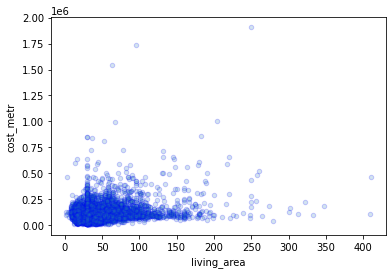

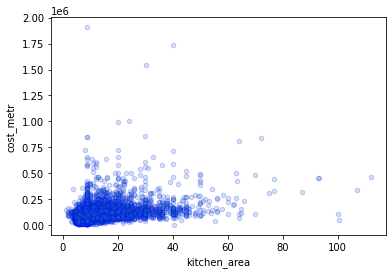

In [52]:
print('Показатель корреляции living_area:',data['cost_metr'].corr(data['living_area']).round(2))
print('Показатель корреляции kitchen_area:',data['cost_metr'].corr(data['kitchen_area']).round(2))
data.plot(x='living_area', y='cost_metr', kind='scatter', alpha=0.2, ec='blue') 
data.plot(x='kitchen_area', y='cost_metr', kind='scatter', alpha=0.2, ec='blue') 

Оень похожая картина на графики зависимости общей площади от цены. Зависимость тут и у кохонной, и у жилой площади низкая к стоимости квадратного метра, тем не менее, корреляция положительная, а значит с увеличением этих площадей, стоимость квадратного метра, реже, но тоже растет.

**Влияние количества комнат на стоимость квадратного метра:**

In [53]:
rooms_pivot = data.pivot_table(
    index='cost_metr', values='rooms', aggfunc=('count','median')
).sort_values(by='cost_metr')
rooms_pivot.columns = ['rooms_count','rooms_median']
rooms_pivot

,rooms_count,rooms_median
cost_metr,,
111.83,1.0,2.0
7962.96,1.0,2.0
9615.38,1.0,2.0
10185.19,1.0,2.0
10368.66,1.0,2.0
...,...,...
995983.94,1.0,4.0
1000748.13,1.0,5.0
1542604.80,1.0,2.0


Показатель корреляции: 0.06


<AxesSubplot:xlabel='rooms', ylabel='cost_metr'>

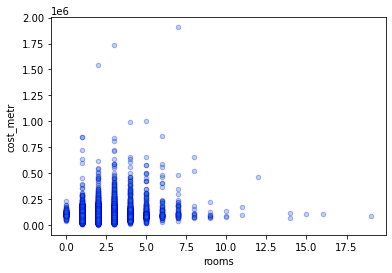

In [54]:
print('Показатель корреляции:',data['cost_metr'].corr(data['rooms']).round(2))
data.plot(x='rooms', y='cost_metr', kind='scatter', alpha=0.3, ec='blue')

Здесь у нас зависимость вообще практически отсутствует. Показатель корреляции 0,06. У трехкомнатных квартир получается выше стоимость метра квадртаного, чем у остальных.

**Влияние этажа, на котором расположена квартира (первый, последний, другой), на стоимость квадратного метра:**

In [55]:
floor_cat_pivot = data.pivot_table(index='floor_category', values='cost_metr', aggfunc=('count','median','mean'))
floor_cat_pivot.columns = ['count_cost_metr','median_cost_metr', 'mean_cost_metr']
floor_cat_pivot

,count_cost_metr,median_cost_metr,mean_cost_metr
floor_category,,,
другой,17363,103468.219537,98275.86
первый,2917,81983.559273,81223.63
последний,3336,93410.716277,87777.78


Здесь довольно понятно, что на первом этаже стоимость метра квадратного реально ниже, чем на всех остальных. Также, квартиры с этажом категории "другой" были чаще в многоэтажных домах, они новее Питерских пятиэтажек и, следовательно, стоимость метра будет больше.

**Влияние даты размещения (день недели, месяц, год) на стоимость квадратного метра:**

In [56]:
season_pivot = data.pivot_table(
    index='cost_metr',values=['weekday_expos','month_expos','year_expos'], aggfunc=('count','median')
).sort_values(by='cost_metr',ascending=False)
season_pivot.columns = ['count_month_expos',
                        'median_month_expos',
                        'count_weekday_expos',
                        'median_weekday_expos',
                        'count_year_expos',
                        'median_year_expos']
season_pivot

,count_month_expos,median_month_expos,count_weekday_expos,median_weekday_expos,count_year_expos,median_year_expos
cost_metr,,,,,,
1907500.00,1.0,9.0,1.0,5.0,1.0,2017.0
1736842.11,1.0,4.0,1.0,2.0,1.0,2018.0
1542604.80,1.0,3.0,1.0,1.0,1.0,2019.0
1000748.13,1.0,2.0,1.0,5.0,1.0,2016.0
995983.94,1.0,10.0,1.0,3.0,1.0,2017.0
...,...,...,...,...,...,...
10368.66,1.0,8.0,1.0,4.0,1.0,2018.0
10185.19,1.0,2.0,1.0,3.0,1.0,2019.0
9615.38,1.0,8.0,1.0,3.0,1.0,2018.0


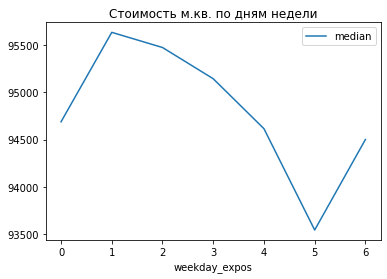

In [94]:
d_pos=data.pivot_table(index='weekday_expos', values='cost_metr', aggfunc=['count', 'median'])
d_pos.columns = ['count', 'median']
d_pos.plot(title='Стоимость м.кв. по дням недели', y='median')
plt.show()

Касательно дня недели для выкладки: из данных видно, что в начале и середине недели люди выкладываются дороже, чем в конце. Самый дешевый метр квадратный у квартир, выложенных в субботу.

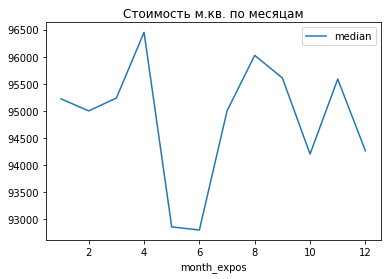

In [95]:
m_pos=data.pivot_table(index='month_expos', values='cost_metr', aggfunc=['count', 'median'])
m_pos.columns = ['count', 'median']
m_pos.plot(title='Стоимость м.кв. по месяцам',y='median')
plt.show()

Касательно сезонности, дороже метр квадратный у квартир, выложенных в апреле,августе и ноябре. Дешевле всего в мае и июне.

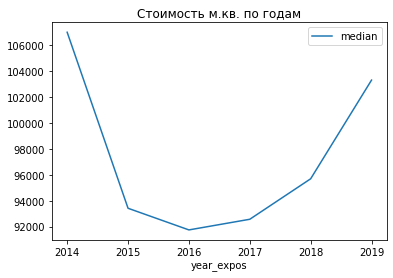

In [93]:
y_pos=data.pivot_table(index='year_expos', values='cost_metr', aggfunc=['count', 'median'])
y_pos.columns = ['count', 'median']
y_pos.plot(title='Стоимость м.кв. по годам',y='median')
plt.show()

 По годам мы видим, что дешевле всего метр квадратный стоил в 2016 (спрос<предложения), а дороже всего в 2014 и 2019 (спрос>предложения).

**По итогам анализа зависимостей стоимости квадратного метра получается интересное наблюдение: из рассмотренных показателей взаимосвязь, хоть и слабая, есть только у Общей Площади (чем выше площадь - тем выше цена за метр), а именно у Кухонной Площади (зависимость довольно слабая, но крепче других: чем больше кухня, тем выше цена за метр). Лучше всего присматривать себе квартиру в мае или июне - в эти месяцы метр квадратный дешевле всего.**

*P.S.Если бы было больше данных по годам, можно было бы примерно представить цикличность и предположить снижение/рост цен в будущем, если не брать в расчет факторы непреодолимой силы.*

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [98]:
total_pivot = data.pivot_table(
    index='locality_name', values='cost_metr', aggfunc=('count','mean')
).sort_values(by='count',ascending=False)
total_pivot.columns = ['notes_count', 'std_meter_cost']
total_pivot['std_meter_cost'] = total_pivot['std_meter_cost'].astype(int)
print(total_pivot.head(10))

                   notes_count  std_meter_cost
locality_name                                 
санкт-петербург          15721          114849
поселок мурино             556           85681
поселок шушары             440           78677
всеволожск                 398           68654
пушкин                     369          103125
колпино                    338           75424
поселок парголово          327           90175
гатчина                    307           68746
деревня кудрово            299           92473
выборг                     237           58141


Из 10ти населенных пунктов с наибольшим числом объявлений в лидерах Санкт-Петербург, а меньше всех в Выборге. Посмотрим, где же дешевле квадратный метр, а где дороже.

In [59]:
total_pivot = total_pivot.head(10)
max_cost = total_pivot[total_pivot['std_meter_cost'] == total_pivot['std_meter_cost'].max()]
min_cost = total_pivot[total_pivot['std_meter_cost'] == total_pivot['std_meter_cost'].min()]
print('Наибольшая цена за кв.м. в:', '\n', max_cost, '\n')
print('Наименьшая цена за кв.м. в:', '\n', min_cost)

Наибольшая цена за кв.м. в: 
                  notes_count  std_meter_cost
locality_name                               
санкт-петербург        15721   114849.008793 

Наименьшая цена за кв.м. в: 
                notes_count  std_meter_cost
locality_name                             
выборг                 237    58141.909325


**Итак, получается, что чемпион по стоимости кв. м. Санкт Петербург - ср. стоимость метра 114849р. Дешевле всего получится в Выборге, там ср. стоимость кв. м. 58141р.**

#### Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра. Учтём каждый километр расстояния: узнаем среднюю цену квартир в одном километре от центра, в двух и так далее. Опишем, как стоимость объектов зависит от расстояния до центра города — построим график изменения средней цены для каждого километра от центра Петербурга.

In [60]:
lama = data[data['locality_name'] == 'санкт-петербург']
lama = lama[['locality_name','last_price', 'center_km']]
lama['last_price'] = (lama['last_price']/1000000) #перевели стоимость в млн.руб.
lama.head(10)

,locality_name,last_price,center_km
0,санкт-петербург,13.000,17
2,санкт-петербург,5.196,14
3,санкт-петербург,64.900,7
4,санкт-петербург,10.000,9
7,санкт-петербург,7.915,12
9,санкт-петербург,5.400,16
10,санкт-петербург,5.050,14
15,санкт-петербург,4.650,15
16,санкт-петербург,6.700,11
17,санкт-петербург,4.180,15


<AxesSubplot:xlabel='center_km'>

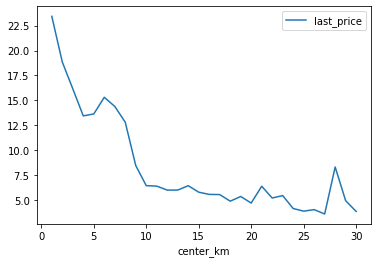

In [61]:
std_lama = lama[['last_price','center_km']].groupby(['center_km']).mean()
std_lama.head(10)
std_lama.plot(xlabel='center_km',y='last_price')

**Как и должно быть: чем ближе квартира к центру, тем выше цена. Выбросы я бы объяснил либо ошибкой выгрузки, либо тем, что в новостройках квартиры дороже, чем в старых домах.**
- P.S. Зона зависимости от центра города заказнчивается за пределами границ города.

### Напишите общий вывод

***Общий вывод:***
- **1. Успешно импортировали таблицу, определили проблемные места, оценили общую ситуацию с данными.**
- **2. Провели предобработку данных, дополнили данные там, где возможно, поработали над их типом, подумали над возможными проблемами возникновения.**
- **3. Добавили новые критерии/категории для дальнейшей оценки данных.**
- **4. Больше всего объявлений квартир в самом Санкт-Петербурге, где самые популярные - "однушки" и "двушки" со средним ценником 5,5 млн.руб. По стоимости квартир с Питером посоревнуется, разве что, Пушкин. Там средние цены максимально приближены к значениям Северной Столицы. Быстрой продажей можно назвать срок до 44 дней, ну а медленной - дольше 259дн. (при этом "нормально" будет ждать продажи и 600 дней). Касательно зависимости стоимости квадратного метра от критериев, победителем выступает Общая площадь, где больший вес оказывает размер кухни (P.S. что соответствует действительности, поскольку ниже цена квартир в советских домах ("кораблях"/"хрущёвках"), где в реальности кухни по 5м.кв., я с женой рассматриваю квартиры в первую очередь из-за планировки). Лучше всего присматривать себе квартиру в январе, мае и октябре - в эти месяцы метр квадратный дешевле всего. А где же квадратный метр самый дешевый? - В Выборге, тогда как самый дорогой, естественно, в Санкт-Петербурге. Если бюджет ограничен - не советую смотреть квартиру в центре Северной Столицы - тут чем ближе к Дворцовой, тем дороже!**